# DATA_620:Project_2

<b>GROUP3: </b>

+ Md. Jalal Uddin
+ Rajwant Mishra
+ Sarah Wigodsky
+ Brian Liles

YouTube : [here](http://youtu.be/ZiFBX5gbQY8?hd=1) 


Assignment Details: <br>
1) Identify a large 2-node network dataset—you can start with a dataset in a repository. Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.

2) Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.

3) What can you infer about each of the distinct groups?


<b>Data Source: </b>NASA Astrophysics Data System (https://ui.adsabs.harvard.edu/)

NASA Astrophysics Data has the affiliations between authors and their journals. This data set is a large 2-node network data set which has the information of Journal name and Author name of publication. For example, there are two or more journal for one publications. The primary objective of this project is to use clustering techniques such as the island method. With the help of the method we will to try to find small sub-networks/subgroups of important authors that are frequently collaborating together. We will also see which journals stand out as main points for these types of collaborations.


In [151]:
import networkx as nx
import os
import ads as ads 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite as bi
from networkx.algorithms import bipartite
plt.figure(figsize = (17,8))
%matplotlib inline

In [152]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

bottom_nodes, top_nodes = bipartite.sets(B)

In [153]:
bottom_nodes, top_nodes
df_m.head(10)

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
0,Nature Materials,"Novoselov, K. S."
1,Astronomy and Astrophysics,"Shakura, N. I."
1,Astronomy and Astrophysics,"Sunyaev, R. A."
2,The Astrophysical Journal Supplement Series,"Spergel, D. N."
2,The Astrophysical Journal Supplement Series,"Verde, L."
2,The Astrophysical Journal Supplement Series,"Peiris, H. V."
2,The Astrophysical Journal Supplement Series,"Komatsu, E."
2,The Astrophysical Journal Supplement Series,"Nolta, M. R."
2,The Astrophysical Journal Supplement Series,"Bennett, C. L."


In [128]:
# pd.pivot_table('Journal','Author_Name')
# BP = nx.DiGraph()
# BP = nx.from_pandas_edgelist(df_m, 'Journal', 'Author_Name')
# # nx.draw(BP)
# # plt.show()

In [41]:
BP.is_directed()

False


##### Building the data set from Astrophysics data system:


In [154]:
os.environ["ADS_DEV_KEY"] = "kNUoTurJ5TXV9hsw9KQN1k8wH4U0D7Oy0CJoOvyw"

In [155]:
ads.config.token = 'ADS_DEV_KEY'

In [156]:
#Searching for papers which are most rated: I have searched here for those journal which have given most stars.
papers1 = list(ads.SearchQuery(q= "stars", sort="citation_count", max_pages=1 ))

In [157]:
# To find the name of the author.
a = []
for i in papers1:
    authors1 = i.author
    a.append(authors1)
author_names = a

In [621]:
# And, then finding the journals of the authors
j = []
for i in papers1:
    journals1 = i.pub
    j.append(journals1)
journals = j

C:\ProgramData\Anaconda3\lib\site-packages\ads\utils.py:31: UserWarning: You are lazy loading attributes via 'pub', and so are making multiple calls to the API. This will impact your overall rate limits.
  UserWarning,


In [622]:
# Now, creating a data frame of author and the journal
df = pd.DataFrame({'Author_Names' : author_names,
 'Journal':journals
  })

In [623]:
# Expanding the data frame (df) with melt
s1 = df.apply(lambda x: pd.Series(x['Author_Names']),axis=1).stack().reset_index(level=1, drop=True)
s1.name = 'Author_Name'
df_m = df.drop('Author_Names', axis=1).join(s1)
df_m.head()

,Journal,Author_Name
0,Nature Materials,"Geim, A. K."
0,Nature Materials,"Novoselov, K. S."
1,Astronomy and Astrophysics,"Shakura, N. I."
1,Astronomy and Astrophysics,"Sunyaev, R. A."
2,The Astrophysical Journal Supplement Series,"Spergel, D. N."


Creating Nodes and Edge for author and the journal from the df_m data set:

In [624]:
author_nodes = pd.DataFrame(df_m.Author_Name.unique(),columns=['Author_Name'])
# author_nodes['node_type'] = 'Author_Name'
journal_nodes = pd.DataFrame(df_m.Journal.unique(), columns=['Journal'])
# journal_nodes['node_type'] = 'Journal'

In [625]:
g = nx.Graph()

# Building the graph from the node sets and edges

a_nodes = list(author_nodes['Author_Name'])

    

# nx.a_nodes["NodeType"] = "Author"
j_nodes = list(journal_nodes['Journal'])
edge_bunch = [tuple(i) for i in df_m.values]


g.add_nodes_from(a_nodes, bipartite=0)
g.add_nodes_from(j_nodes, bipartite=1)
g.add_edges_from(edge_bunch)

# nx.draw(g)
# plt.show()

In [626]:
for node in a_nodes:
    g.node[node]["category"] = "Author"
    
for node in j_nodes:
    g.node[node]["category"] = "Journal"
     
color_map = {
    "Author": "red",
    "Journal": "green"
}

In [627]:
g.nodes['Geim, A. K.']

{'bipartite': 0, 'category': 'Author'}

In [628]:
g.nodes['The Astrophysical Journal']

{'bipartite': 1, 'category': 'Journal'}

In [95]:
# nx.write_gml(g,"mode.gml")

In [629]:
set(df_m.Journal)

{'A Wiley-Interscience Publication',
 'Annual Review of Astronomy and Astrophysics',
 'Astronomy and Astrophysics',
 'Astronomy and Astrophysics Supplement Series',
 'ESA Special Publication',
 'Monthly Notices of the Royal Astronomical Society',
 'Nature',
 'Nature Materials',
 'Physical Review Letters',
 'Princeton',
 'Publications of the Astronomical Society of the Pacific',
 'Reviews of Modern Physics',
 'San Francisco: W.H. Freeman',
 'The Astronomical Journal',
 'The Astrophysical Journal',
 'The Astrophysical Journal Supplement Series'}

In [630]:
a = set(df_m.Author_Name)
len(a)

1662

In [631]:
# find the largest most connected graph - 200 as cut-off 
big_subg = [i for i in nx.connected_component_subgraphs(g) if len(i) > 200]
# Largest:
sg_largest = big_subg[0] # largest connected subgraph

big_subg

In [633]:
[len(c) for c in nx.connected_component_subgraphs(g)]

[3, 29, 312, 7, 3, 1308, 4, 2, 3, 5, 2]

(array([9., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([   2. ,  132.6,  263.2,  393.8,  524.4,  655. ,  785.6,  916.2,
        1046.8, 1177.4, 1308. ]),
 <a list of 10 Patch objects>)

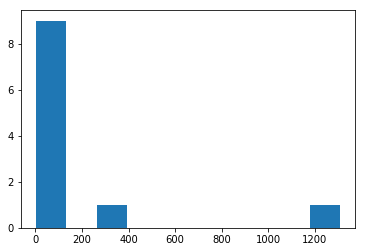

In [632]:
# so we have total 11 componnet 
x = [len(c) for c in nx.connected_component_subgraphs(g)]
plt.hist(x)


Green JOurnal 
Rest Authort

![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/gj.jpg?raw=true)
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/gj1.jpg?raw=true)


In [634]:
# weighted_projections can be applied to this subgraph to separate the two components
Journals,Author_Names = bi.sets(sg_largest) 

![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/Eigen.png?raw=true)

##### Eigenvector 
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/EigenName.png?raw=true)


The network graphs above show a large network, in which trends and connections are hard to define due to the large size.

In [635]:
#Information about nodes, edges, and degree of the data
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 1678
Number of edges: 1694
Average degree:   2.0191


# Island Method

The island method will be used to split up the network into smaller components.  The logic behind the island method is to consider the network as an island with peaks and valleys.  As the water level is raised, the network becomes divided - some parts of the network are removed (they are under water) while other more significant parts of the network remain and are split into different segments. Now these smaller segments can be better analyzed.

In [637]:
nx.is_bipartite(g)

True

NameError: name 'label' is not defined

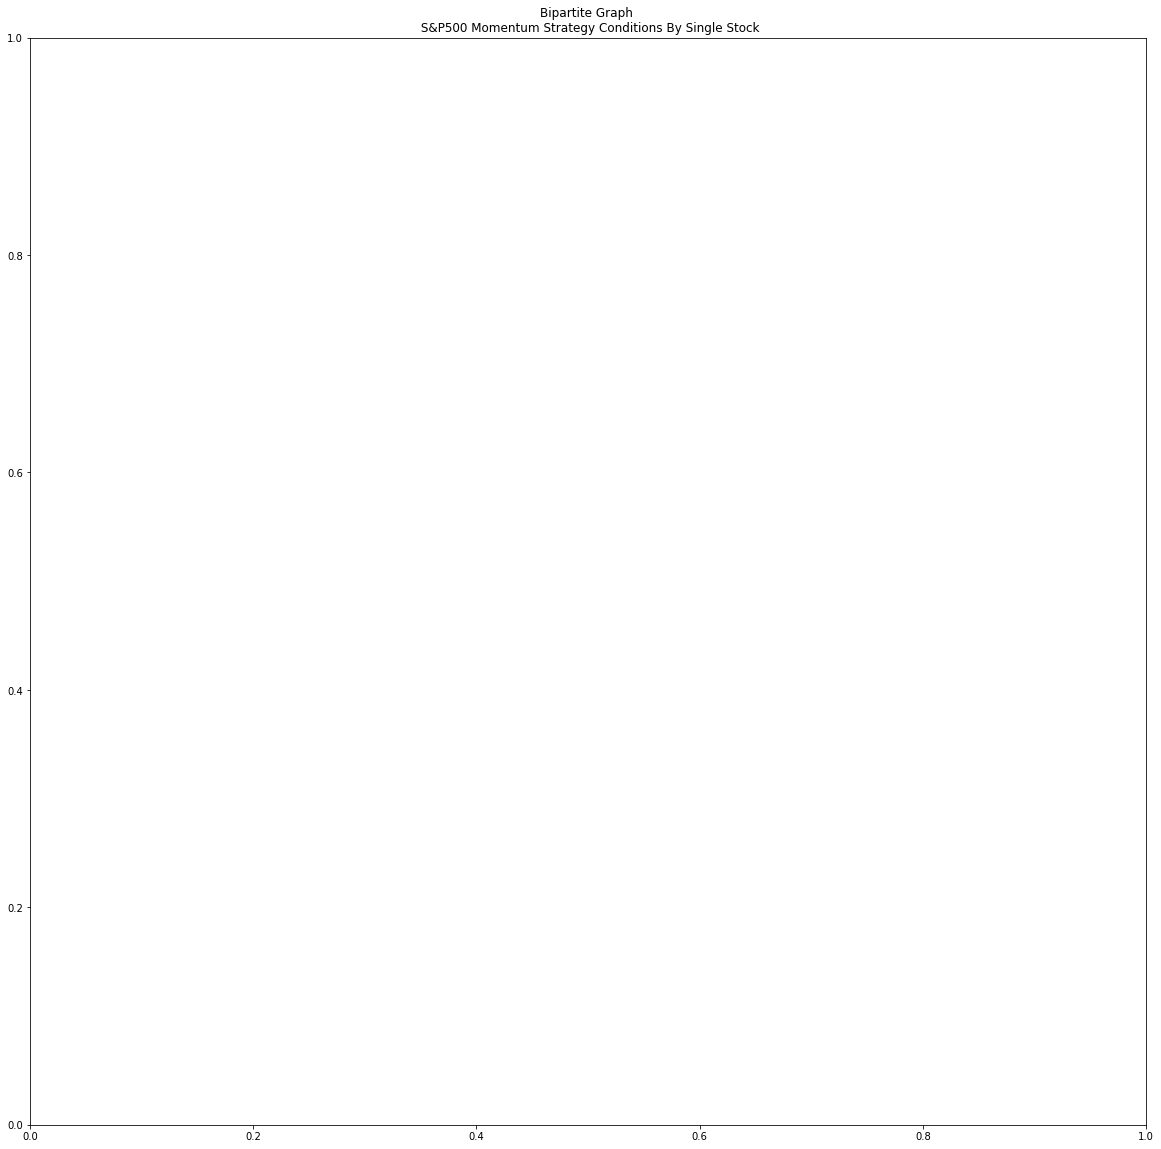

In [638]:
#--------------------------------------------------REMOVE
# determine the positions using spring layout
G_position=nx.spring_layout(g)
# define plot formatting parameters
plotFontSize=10
plotAlpha=0.25
plotLabelsFlag=True
# color list
plotColorsList=list()
# legend color patch list
legendColorPatch=list()

# define title
titleName='Bipartite Graph \n S&P500 Momentum Strategy Conditions By Single Stock'
# set figure size
plt.figure(figsize=(20,20))
# add title
plt.title(titleName)
colors=[]
color=bipartite.color(B)
for n, c in g.nodes('bipartite'):
    if (c == 1 ):
        colors.append('teal')
    else:
        colors.append('navy')

nx.draw_networkx_nodes(g, G_position,node_color=B.node[label]['color'],alpha=plotAlpha,
        with_labels=plotLabelsFlag)


In [639]:
# identify top and bottom nodes
top_nodes = {n for n, d in g.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(g) - top_nodes



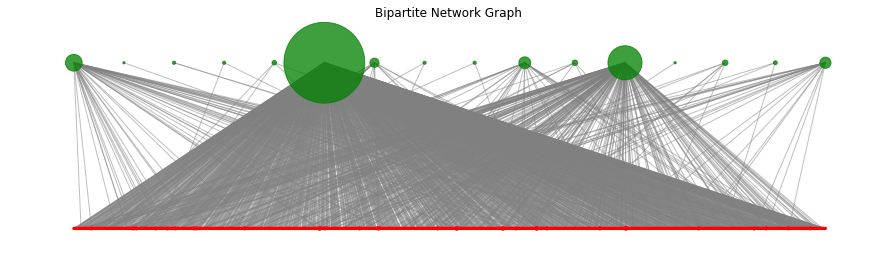

In [642]:
# legend color patch list
legendColorPatch=list()
plt.figure(figsize=(15, 4))           
# set layout position
pos=nx.bipartite_layout(g,bottom_nodes, align='horizontal') 
colors=[]
color=bipartite.color(g)
for n, c in g.nodes('bipartite'):
    if (c == 1 ):
        colors.append('green')
    else:
        colors.append('red')

# nodes
d = g.degree()
nx.draw_networkx_nodes(g,pos, node_color=colors,node_size=[v*5 for v in dict(d).values()],alpha=0.75,label=True)

# edges drawn with widths set to edge weight
nx.draw_networkx_edges(g,pos,alpha=0.5,edge_color='grey',style='solid')
# add legend

plt.axis('off')
plt.title('Bipartite Network Graph')
plt.show()

In [199]:
# determine if the graph is connected
isConnectedFlag=nx.is_connected(g)
# determine if the graph is directed
isDirectedFlag=nx.is_directed(g)
# determine if the graph is bipartite
isBipartiteFlag=nx.is_bipartite(g)

isConnectedFlag, isDirectedFlag,isBipartiteFlag

(False, False, True)

In [334]:
adm= bi.biadjacency_matrix(g,a_nodes,j_nodes)
jdm= bi.biadjacency_matrix(g,j_nodes,a_nodes)

In [335]:
type(adm)

# Return a Coordinate (coo) representation of the Compresses-Sparse-Column (csc) matrix.
coo = adm.tocoo(copy=False)




In [336]:
type(coo), type(adm)
tdk = coo.col
tdkr = coo.row
type(tdk)
len(set(tdk)),len(set(tdkr))

(16, 1662)

In [337]:
adm_df = pd.DataFrame({'Author': coo.row, 'Journal': coo.col, 'data': coo.data})

adm_df['J_name'] = [j_nodes[n] for n in adm_df['Journal']]
adm_df['A_name'] = [a_nodes[n] for n in adm_df['Author']]
adm_df.head()

,Author,Journal,data,J_name,A_name
0,0,0,1,Nature Materials,"Geim, A. K."
1,1,0,1,Nature Materials,"Novoselov, K. S."
2,2,1,1,Astronomy and Astrophysics,"Shakura, N. I."
3,3,1,1,Astronomy and Astrophysics,"Sunyaev, R. A."
4,4,2,1,The Astrophysical Journal Supplement Series,"Spergel, D. N."


In [401]:
graphMat= pd.pivot_table(adm_df,values='data', index='A_name', columns='J_name',fill_value=0)

pd.pivot_table(adm_df[adm_df.J_name=='A Wiley-Interscience Publication'],values='data', index='A_name', columns='J_name',fill_value=0)




J_name,A Wiley-Interscience Publication
A_name,
"Shapiro, Stuart L.",1
"Spitzer, Lyman",1
"Teukolsky, Saul A.",1


Below Graph shows the Journal with Degree 
![](https://github.com/Rajwantmishra/620Group/blob/master/Project2-26Jun/bipart1-J.png?raw=true)

In [351]:
# create graph from dataframe biadjacency matrix
def graphFromBiadjacencyPandasDf(df):
    # create empty graph
    G = nx.Graph()
    # iterate over rows
    for i in df.index:
        # add row label [mode 0]
        G.add_node(i, bipartite=0)
        # iterate over columns
        for j in df.columns:
            # add column label [mode 1]
            G.add_node(j, bipartite=1)
            # if value is greater than zero
            #print(str(i)+'|'+str(j)+'|'+str(df.loc[i,j]))
            if (df.loc[i,j] > 0):
                # add weighted edge
                #B.add_edge(i, j, weight=df.ix[i,j])
                # add edge
                G.add_edge(i, j)
    # return bipartite graph
    return G

In [412]:
adm_df.head()

,Author,Journal,data,J_name,A_name
0,0,0,1,Nature Materials,"Geim, A. K."
1,1,0,1,Nature Materials,"Novoselov, K. S."
2,2,1,1,Astronomy and Astrophysics,"Shakura, N. I."
3,3,1,1,Astronomy and Astrophysics,"Sunyaev, R. A."
4,4,2,1,The Astrophysical Journal Supplement Series,"Spergel, D. N."


In [413]:
# convert adjacency matrix to graph
# Passing the Authoer name and Journal Data
adm_df_G =   adm_df[['Author','Journal','data']]
G = graphFromBiadjacencyPandasDf(graphMat)

# determine if the graph is connected
isConnectedFlag=nx.is_connected(G)
# determine if the graph is directed
isDirectedFlag=nx.is_directed(G)
# determine if the graph is bipartite
isBipartiteFlag=nx.is_bipartite(G)

adm_df_G.head()

,Author,Journal,data
0,0,0,1
1,1,0,1
2,2,1,1
3,3,1,1
4,4,2,1


We can see that the network is bipartite and connected, but not directed as follows:

In [414]:
isConnectedFlag

False

In [404]:
isDirectedFlag

False

In [405]:
isBipartiteFlag

True

Now compute the Degree of each Node

In [415]:
# degree by node
degreeByNode = G.degree()
# degreeByNode

In [607]:
# convert degree dictionary to dataframe
degreeByNodeDf=pd.DataFrame.from_dict(degreeByNode)

degreeByNodeDf
len(a_nodes)

1662

In [608]:
# Function to Calcuate Degree of each node

def calcualte_degree(G,n = 0):
    fmdegree = []
    fmNode = []
    fmbipart = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD >= n : fmdegree.append(tempD),fmNode.append(node),fmbipart.append(G.nodes[node]['bipartite'])
            
    return fmdegree,fmNode ,fmbipart

gpdDegree , gpdNode , gpdBi = calcualte_degree(G,0)

In [609]:
G.nodes['Abazajian, Kevork N.']['bipartite']

0

In [610]:
# bloggers with the highest degree centrality
data = {'Node': gpdNode, 
        'Degree': gpdDegree,
       'Bipart': gpdBi}

df_NodeDegree = pd.DataFrame( data)
df_NodeDegree.head()
df_NodeDegree.sort_values(by=['Degree'],ascending= False).head(20)




,Node,Degree,Bipart
9,Physical Review Letters,1307,1
16,The Astrophysical Journal Supplement Series,232,1
15,The Astrophysical Journal,56,1
3,Astronomy and Astrophysics,28,1
6,Monthly Notices of the Royal Astronomical Society,25,1
14,The Astronomical Journal,17,1
2,Annual Review of Astronomy and Astrophysics,6,1
4,Astronomy and Astrophysics Supplement Series,6,1
12,Reviews of Modern Physics,4,1
638,"Heckman, Timothy M.",3,0


In [762]:
df_m.head()

,Journal,Author_Name,edge_Weight
0,Nature Materials,"Geim, A. K.",2
0,Nature Materials,"Novoselov, K. S.",2
1,Astronomy and Astrophysics,"Shakura, N. I.",28
1,Astronomy and Astrophysics,"Sunyaev, R. A.",28
2,The Astrophysical Journal Supplement Series,"Spergel, D. N.",232


In [961]:
df_NodeDegree[df_NodeDegree.Node.isin(['Nature Materials','Astronomy and Astrophysics','Geim, A. K.', 'Novoselov, K. S.', 'Shakura, N. I.', 'Sunyaev, R. A.', 'Spergel, D. N.'])]
set(df_NodeDegree.Degree)

{1, 2, 3, 4, 6, 17, 25, 28, 56, 232, 1307}

In [887]:
#df_m.iloc[2][1] 
#range(len(df_m))

#df_NodeDegree[df_NodeDegree.Node.isin(['Nature Materials','Astronomy and Astrophysics','Geim, A. K.', 'Novoselov, K. S.', 'Shakura, N. I.', 'Sunyaev, R. A.', 'Spergel, D. N.'])]
# df_NodeDegree[df_NodeDegree.Node == 'Physical Review Letters' ]['Degree'].values[0]

# We will calcualte the edege weight as the Degree of the Both the node and later on normalizing it by
# Devide all weight by max of weight
df_m['edge_Weight'] = [ (df_NodeDegree[df_NodeDegree.Node == df_m.iloc[i][1]]['Degree'].values[0]  )*
               (df_NodeDegree[df_NodeDegree.Node == df_m.iloc[i][0]]['Degree'].values[0])
               for i in range(len(df_m))  ] 
df_m.head()



,Journal,Author_Name,edge_Weight
0,Nature Materials,"Geim, A. K.",2
0,Nature Materials,"Novoselov, K. S.",2
1,Astronomy and Astrophysics,"Shakura, N. I.",28
1,Astronomy and Astrophysics,"Sunyaev, R. A.",28
2,The Astrophysical Journal Supplement Series,"Spergel, D. N.",232


In [763]:
max_edge_weight= df_m['edge_Weight'].max()
df_m['edge_Weight'] = df_m['edge_Weight']/df_m['edge_Weight'].max()

In [889]:
df_m.head()

,Journal,Author_Name,edge_Weight
0,Nature Materials,"Geim, A. K.",2
0,Nature Materials,"Novoselov, K. S.",2
1,Astronomy and Astrophysics,"Shakura, N. I.",28
1,Astronomy and Astrophysics,"Sunyaev, R. A.",28
2,The Astrophysical Journal Supplement Series,"Spergel, D. N.",232


In [924]:
wG = nx.from_pandas_edgelist(df_m, 'Journal', 'Author_Name',edge_attr=True)
type(wG)
nx.is_bipartite(wG)

True

In [891]:
wG['Nature Materials']

AtlasView({'Geim, A. K.': {'edge_Weight': 2}, 'Novoselov, K. S.': {'edge_Weight': 2}})

In [892]:
wG.edges.data('edge_Weight')

EdgeDataView([('Nature Materials', 'Geim, A. K.', 2), ('Nature Materials', 'Novoselov, K. S.', 2), ('Astronomy and Astrophysics', 'Shakura, N. I.', 28), ('Astronomy and Astrophysics', 'Sunyaev, R. A.', 28), ('Astronomy and Astrophysics', 'van Leeuwen, F.', 28), ('Astronomy and Astrophysics', 'Duquennoy, A.', 28), ('Astronomy and Astrophysics', 'Mayor, M.', 28), ('Astronomy and Astrophysics', 'Perryman, M. A. C.', 28), ('Astronomy and Astrophysics', 'Lindegren, L.', 28), ('Astronomy and Astrophysics', 'Kovalevsky, J.', 28), ('Astronomy and Astrophysics', 'Hog, E.', 28), ('Astronomy and Astrophysics', 'Bastian, U.', 28), ('Astronomy and Astrophysics', 'Bernacca, P. L.', 28), ('Astronomy and Astrophysics', 'Creze, M.', 28), ('Astronomy and Astrophysics', 'Donati, F.', 28), ('Astronomy and Astrophysics', 'Grenon, M.', 28), ('Astronomy and Astrophysics', 'Grewing, M.', 28), ('Astronomy and Astrophysics', 'van der Marel, H.', 28), ('Astronomy and Astrophysics', 'Mignard, F.', 28), ('Astronom

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


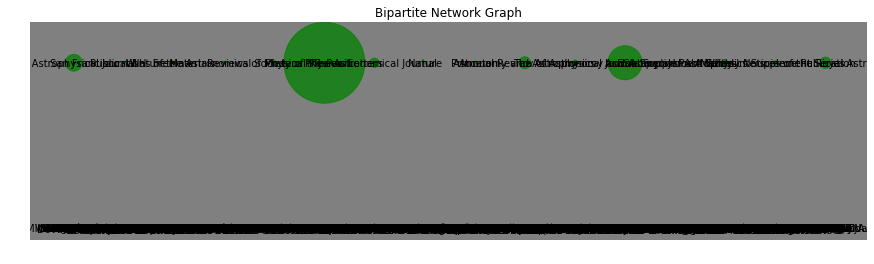

In [893]:
wG.add_nodes_from(a_nodes, bipartite=0)
wG.add_nodes_from(j_nodes, bipartite=1)


# legend color patch list
legendColorPatch=list()
plt.figure(figsize=(15, 4))           
# set layout position
pos=nx.bipartite_layout(wG,bottom_nodes, align='horizontal') 
colors=[]
color=bipartite.color(wG)
for n, c in wG.nodes('bipartite'):
    if (c == 1 ):
        colors.append('green')
    else:
        colors.append('red')

# nodes

d = wG.degree()
# nx.draw(wG,with_labels=1)
nx.draw_networkx_nodes(wG,pos, node_color=colors,node_size=[v*5 for v in dict(d).values()],alpha=0.75,with_labels=1)

# edges drawn with widths set to edge weight
nx.draw_networkx_edges(wG,pos,alpha=0.5,edge_color='grey',width=[c*5 for (u, v, c) in wG.edges.data('edge_Weight')],style='solid')
# add legend

labels = nx.get_edge_attributes(wG,'edge_Weight')
# add labels
nx.draw_networkx_labels(wG,pos=pos,font_size=10)

plt.axis('off')
plt.title('Bipartite Network Graph')
plt.show()

In [894]:
nx.is_connected(wG)

False

In all above graph we see that is a big graph but is not fully ocneected graph, Now we will try find connected graph in this graph following method:

In [895]:
print(len([(len(i),i) for i in nx.connected_component_subgraphs(wG) if len(i)]))
[(len(i),i) for i in nx.connected_component_subgraphs(wG) if len(i)]

11


[(3, <networkx.classes.graph.Graph at 0x25f1295f048>),
 (29, <networkx.classes.graph.Graph at 0x25f1295f0b8>),
 (312, <networkx.classes.graph.Graph at 0x25f1295f358>),
 (7, <networkx.classes.graph.Graph at 0x25f1295f5f8>),
 (3, <networkx.classes.graph.Graph at 0x25f1295f278>),
 (1308, <networkx.classes.graph.Graph at 0x25f1295f470>),
 (4, <networkx.classes.graph.Graph at 0x25f1575cb38>),
 (2, <networkx.classes.graph.Graph at 0x25f09ea87b8>),
 (3, <networkx.classes.graph.Graph at 0x25f09ea8860>),
 (5, <networkx.classes.graph.Graph at 0x25f09ea8240>),
 (2, <networkx.classes.graph.Graph at 0x25f09ea8b70>)]

This results shows that we have 11 connected components in this network which can exaplain this netwrok. We have total 11 componnet , and there is biggest component of size 1308 and rest all are less than 100 and only one with size of 312. 
We may consider the big component as whole netwrok but it would still be big to do any analysis .

In [1002]:
# find the largest most connected graph - 200 as cut-off 
big_subg =[(len(i),i) for i in nx.connected_component_subgraphs(wG) if len(i) > 100]


# Largest:
sg_largest = big_subg[0][1] # largest connected subgraph

big_subg[0]


(312, <networkx.classes.graph.Graph at 0x25f14f1a240>)

In [897]:
nx.is_connected(sg_largest)

True

We can see that this graph is connected Graph and it means there is path from one node to other within this component. 

In [992]:
# ## Implementing the Island Method to look for important subgroups. 
# def trim_edges(b, weight = 1):
#     # Implements a trimming of the graph edges for the Island Analysis
#     b2 = nx.Graph()
#     for u, v, c in b.edges(data=True):
# #         print("c:",c['edge_Weight'])
#         if c['edge_Weight'] > weight:
#             b2.add_edge(u,v, weight=c)
#     return b2

# ## Return list of graphs each corresponding to different thresholds
# def island_method(B, iterations=3):
#     weights= [(c*max_edge_weight) for (u, v, c) in B.edges.data('edge_Weight')]
#     mn=int(min(weights))
#     mx=int(max(weights))
#     #compute the size of step
#     step=int((mx-mn)/iterations)
#     return [[threshold, trim_edges(B, threshold)] for threshold in range(mn,mx,step)]
# #     return [[threshold] for threshold in range(mn,mx,step)]


# ## Return list of graphs each corresponding to different thresholds
# def island_method_deg(B, iterations=3):
#     weights= [(c) for (u, v, c) in B.edges.data('edge_Weight')]
#     mn=int(min(weights))
#     mx=int(max(weights))
#     #compute the size of step
#     step=int((mx-mn)/iterations)
# #     return [[threshold, trim_edges(B, threshold)] for threshold in range(mn,mx,step)]
#     return [[threshold] for threshold in range(mn,mx,step)]

In [899]:
G['Geim, A. K.']
cc.edges['Lindegren, L.', 'Astronomy and Astrophysics']

# weights= [(c * max_edge_weight) for (u, v, c) in wG.edges.data('edge_weight')]

{'edge_Weight': 0.02142310635042081}

In [1050]:
cc[5].edges.data('edge_Weight')


EdgeDataView([('Physical Review Letters', 'Abbott, B. P.', 1307), ('Physical Review Letters', 'Abbott, R.', 1307), ('Physical Review Letters', 'Abbott, T. D.', 1307), ('Physical Review Letters', 'Abernathy, M. R.', 1307), ('Physical Review Letters', 'Acernese, F.', 1307), ('Physical Review Letters', 'Ackley, K.', 1307), ('Physical Review Letters', 'Adams, C.', 1307), ('Physical Review Letters', 'Adams, T.', 1307), ('Physical Review Letters', 'Addesso, P.', 1307), ('Physical Review Letters', 'Adhikari, R. X.', 1307), ('Physical Review Letters', 'Adya, V. B.', 1307), ('Physical Review Letters', 'Affeldt, C.', 1307), ('Physical Review Letters', 'Agathos, M.', 1307), ('Physical Review Letters', 'Agatsuma, K.', 1307), ('Physical Review Letters', 'Aggarwal, N.', 1307), ('Physical Review Letters', 'Aguiar, O. D.', 1307), ('Physical Review Letters', 'Aiello, L.', 1307), ('Physical Review Letters', 'Ain, A.', 1307), ('Physical Review Letters', 'Ajith, P.', 1307), ('Physical Review Letters', 'Al

In [1023]:
cc= list(nx.connected_component_subgraphs(wG))
print("Total Components {} with size: ".format(len(cc)),[(len(c)) for c in cc])

Total Components 11 with size:  [3, 29, 312, 7, 3, 1308, 4, 2, 3, 5, 2]


Lets check Max and Min weight of the Edge in each Componnet to identify if we can find any more island in it.


In [1024]:
print("min","max","step")
for i in range(len(cc)):
    weights= [(c) for (u, v, c) in cc[i].edges.data('edge_Weight')]
    print("Componnet {} of size {} has Maximum Edge Weight:{} and Mininum Edge weight:{} with differnce :[{}]".
         format(i,len(cc[i]),int(max(weights)),int(min(weights)),(int(max(weights))-int(min(weights)))))


min max step
Componnet 0 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 1 of size 29 has Maximum Edge Weight:28 and Mininum Edge weight:28 with differnce :[0]
Componnet 2 of size 312 has Maximum Edge Weight:696 and Mininum Edge weight:2 with differnce :[694]
Componnet 3 of size 7 has Maximum Edge Weight:6 and Mininum Edge weight:6 with differnce :[0]
Componnet 4 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 5 of size 1308 has Maximum Edge Weight:1307 and Mininum Edge weight:1307 with differnce :[0]
Componnet 6 of size 4 has Maximum Edge Weight:3 and Mininum Edge weight:3 with differnce :[0]
Componnet 7 of size 2 has Maximum Edge Weight:1 and Mininum Edge weight:1 with differnce :[0]
Componnet 8 of size 3 has Maximum Edge Weight:2 and Mininum Edge weight:2 with differnce :[0]
Componnet 9 of size 5 has Maximum Edge Weight:4 and Mininum Edge weight:4 with differnce :[0]
Componnet 10 of size 2 has Ma

This indicates that we can't find island in any Componnets except Componnet 3 (at index 2). Rest all have same edge weight and may go off the water level if dropped from the netwrok.  

In [1030]:
# Makaing Componnet 2 as  Graph we woould try analyse further and see how many Island we can find it. 
big_subg = cc[2]
print(len(big_subg))

312


In [994]:
## Implementing the Island Method to look for important subgroups. 
def trim_edges(b, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    b2 = nx.Graph()
    for u, v, c in b.edges(data=True):
#         print("c:",c['edge_Weight'])
        if c['edge_Weight'] > weight:
            b2.add_edge(u,v, weight=c)
    return b2

## Return list of graphs each corresponding to different thresholds
def island_method(B, iterations=3):
    weights= [(c) for (u, v, c) in B.edges.data('edge_Weight')]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of step
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(B, threshold)] for threshold in range(mn,mx,step)]
#     return [[threshold] for threshold in range(mn,mx,step)]


In [1037]:
island = island_method(big_subg, iterations =  3)
#print the threshold level, size of the graph, and number of connected components
for i in island:
    print("Threshold:",i[0], "Size:",len(i[1]), "Connections:", len(list(nx.connected_component_subgraphs(i[1]))))

# island

Threshold: 2 Size: 311 Connections: 1
Threshold: 233 Size: 13 Connections: 1
Threshold: 464 Size: 5 Connections: 1
Threshold: 695 Size: 5 Connections: 1


In [1069]:
big_subg.edges.data('edge_Weight')

EdgeDataView([('Marriner, John P.', 'The Astrophysical Journal Supplement Series', 232), ('Burstein, D.', 'The Astronomical Journal', 17), ('Gao, L.', 'Monthly Notices of the Royal Astronomical Society', 25), ('Wilhite, Brian C.', 'The Astrophysical Journal Supplement Series', 232), ('Tozzi, Paolo', 'The Astrophysical Journal', 56), ('Fan, Xiaohui', 'The Astrophysical Journal Supplement Series', 232), ('McKay, Timothy A.', 'The Astrophysical Journal Supplement Series', 232), ('West, Andrew A.', 'The Astrophysical Journal Supplement Series', 232), ('Leitherer, Claus', 'The Astrophysical Journal Supplement Series', 232), ('Abazajian, Kevork N.', 'The Astrophysical Journal Supplement Series', 232), ('Smolčić, Vernesa', 'The Astrophysical Journal Supplement Series', 232), ('Vogt, Nicole P.', 'The Astrophysical Journal Supplement Series', 232), ('Bower, Gary', 'The Astronomical Journal', 34), ('Bower, Gary', 'The Astrophysical Journal', 112), ('Re Fiorentin, Paola', 'The Astrophysical Journ

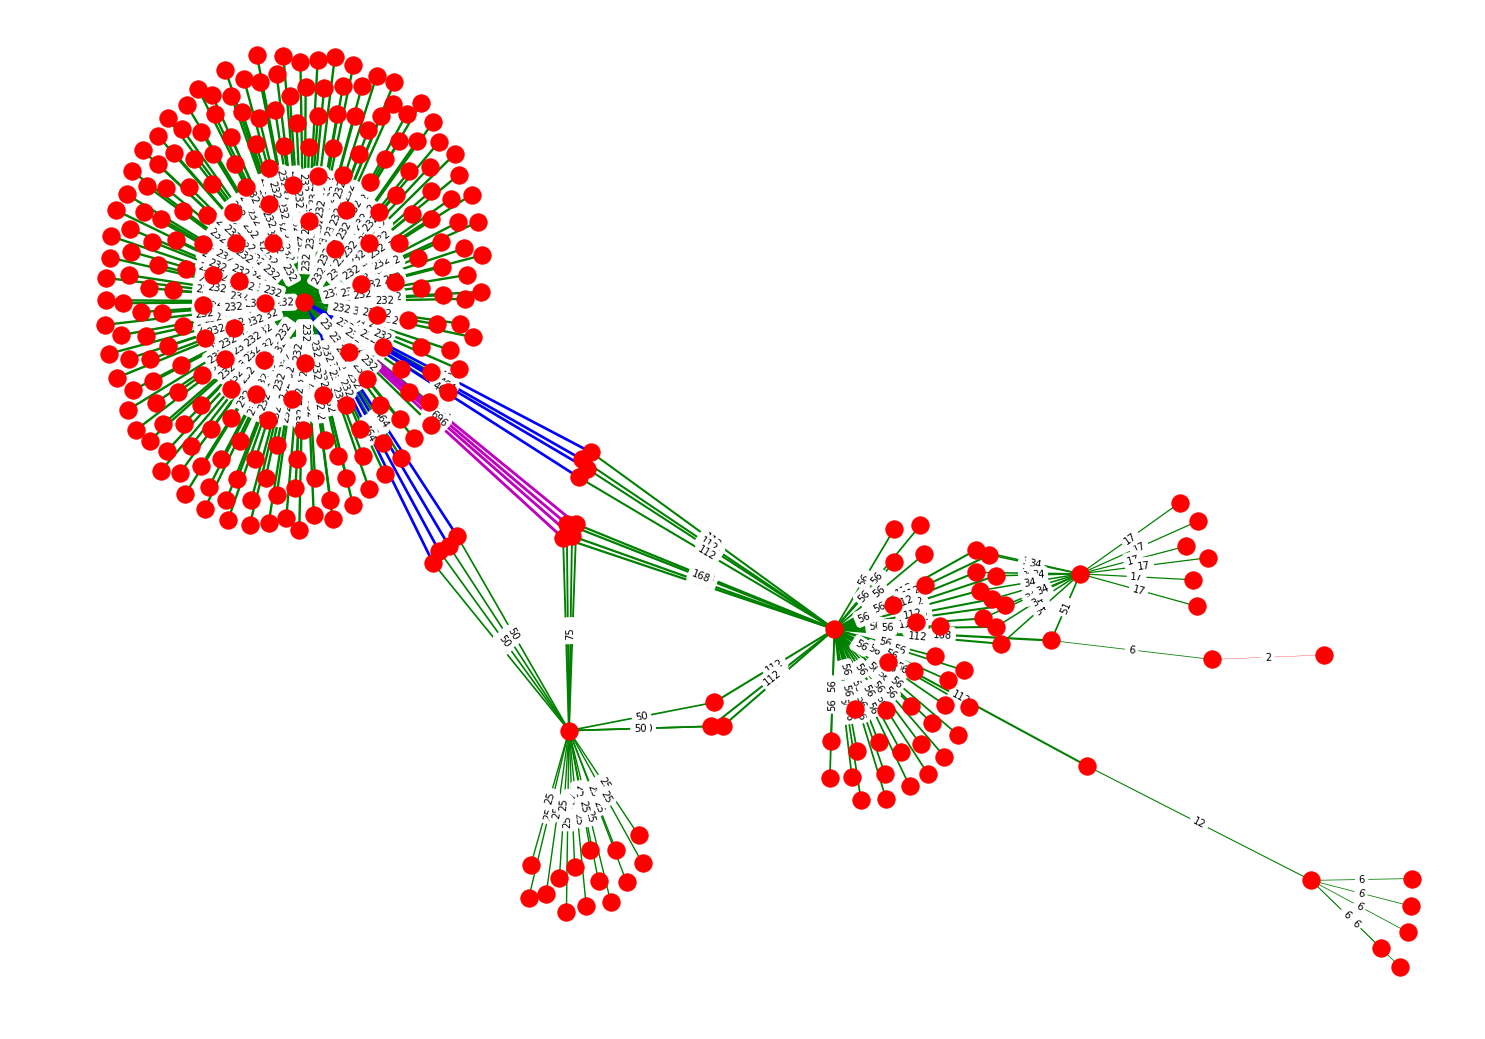

In [1141]:
import math
import numpy
from networkx.drawing.nx_agraph import graphviz_layout
# cG = nx.Graph()
# cG.add_edge(1,2,color='r',weight=2)
# G.add_edge(2,3,color='b',weight=4)
# G.add_edge(3,4,color='g',weight=6)

# determine the positions using spring layout
# pos=nx.(big_subg)
pos = nx.circular_layout(big_subg)
pos= nx.spring_layout(big_subg,scale=5)
# pos = nx.graphviz_layout(big_subg)

# # icolors = [big_subg[u][v]['color'] for u,v in edges]
iweights = [big_subg[u][v]['edge_Weight'] for u,v in iedges]
set(iweights)
plt.figure(figsize=(20,14))

icolor=[]
for i in range(len(iweights)):
    if iweights[i] <=2 :
        icolor.append('r')
    elif iweights[i]  <=233  :
        icolor.append('g')
    elif iweights[i]  <=464  :
        icolor.append('b')
    elif iweights[i]  <=695  :
        icolor.append('m')        
    else:
        icolor.append('m')    
        
set(icolor  ) 
#  iweights 

# [(a,b,c) for a,b,c in tempbig_subg.edges.data('edge_Weight')]

# specifiy edge labels explicitly
edge_labels=dict([((u,v,),d['edge_Weight'])
             for u,v,d in big_subg.edges(data=True)])

nx.draw(big_subg, pos, edges=iedges, edge_color=icolor,width= numpy.log10(iweights))
# nx.draw(big_subg, nx.spring_layout(big_subg,scale=5), edges=iedges, edge_color=icolor,width= numpy.log10(iweights))

# add labels
# networkx.draw_networkx_labels(big_subg,pos=pos,font_size=8)
nx.draw_networkx_edge_labels(big_subg,  pos, edge_labels = edge_labels)

plt.show()

In [1139]:
set(icolor  ) 

# i = iter(range(len(iweights)))
# b = dict(zip(i, iweights))
# b
# [big_subg[u][v]['edge_Weight'] for u,v in iedges]
# {((u,v,),big_subg['edge_Weight']) for (u, v, c) in big_subg.edges.data('edge_Weight')}
edge_labels=dict([((u,v,),d['edge_Weight'])
             for u,v,d in big_subg.edges(data=True)])
edge_labels

{('Marriner, John P.', 'The Astrophysical Journal Supplement Series'): 232,
 ('Burstein, D.', 'The Astronomical Journal'): 17,
 ('Gao, L.', 'Monthly Notices of the Royal Astronomical Society'): 25,
 ('Wilhite, Brian C.', 'The Astrophysical Journal Supplement Series'): 232,
 ('Tozzi, Paolo', 'The Astrophysical Journal'): 56,
 ('Fan, Xiaohui', 'The Astrophysical Journal Supplement Series'): 232,
 ('McKay, Timothy A.', 'The Astrophysical Journal Supplement Series'): 232,
 ('West, Andrew A.', 'The Astrophysical Journal Supplement Series'): 232,
 ('Leitherer, Claus', 'The Astrophysical Journal Supplement Series'): 232,
 ('Abazajian, Kevork N.', 'The Astrophysical Journal Supplement Series'): 232,
 ('Smolčić, Vernesa', 'The Astrophysical Journal Supplement Series'): 232,
 ('Vogt, Nicole P.', 'The Astrophysical Journal Supplement Series'): 232,
 ('Bower, Gary', 'The Astronomical Journal'): 34,
 ('Bower, Gary', 'The Astrophysical Journal'): 112,
 ('Re Fiorentin, Paola', 'The Astrophysical Jour

In [1095]:
# nx.write_edgelist(big_subg,"componnet.edgelist",data=True)
df_m.to_csv("comp3.csv")

df_m.head()
# tempbig_subg = big_subg
# for n in tempbig_subg:
#     tempbig_subg.node[n]['weight'] = tempbig_subg.node[n]['edge_Weight'] 
#     del tempbig_subg.node[n]['edge_Weight']

PermissionError: [Errno 13] Permission denied: 'comp3.csv'

In [1096]:
graphMat.to_csv('matrix.csv')

In [833]:
# The main function that returns 
# count of islands in a given boolean 
# 2D matrix 
def countIslands(self): 
    # Make a bool array to mark visited cells. 
    # Initially all cells are unvisited 
    visited = [[False for j in range(self.COL)]for i in range(self.ROW)] 

    # Initialize count as 0 and travese  
    # through the all cells of 
    # given matrix 
    count = 0
    for i in range(self.ROW): 
        for j in range(self.COL): 
            # If a cell with value 1 is not visited yet,  
            # then new island found 
            if visited[i][j] == False and self.graph[i][j] == 1: 
                # Visit all cells in this island  
                # and increment island count 
                self.DFS(i, j, visited) 
                count += 1

    return count 

In [872]:
graphMat.shape[1]
ROW = graphMat.shape[0]
COL = graphMat.shape[1] 
graph = graphMat


In [870]:
# def __init__( row, col, g): 
#         self.ROW = row 
#         self.COL = col 
#         self.graph = g 
        
# A function to check if a given cell  
# (row, col) can be included in DFS 
def isSafe( i, j, visited): 
    # row number is in range, column number 
    # is in range and value is 1  
    # and not yet visited 
    return (i >= 0 and i < ROW and 
            j >= 0 and j < COL and 
            not visited[i][j] and graph[i][j]) 


# A utility function to do DFS for a 2D  
# boolean matrix. It only considers 
# the 8 neighbours as adjacent vertices 
def DFS(i, j, visited): 

    # These arrays are used to get row and  
    # column numbers of 8 neighbours  
    # of a given cell 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    # Mark this cell as visited 
    visited[i][j] = True

    # Recur for all connected neighbours 
    for k in range(8): 
        if isSafe(i + rowNbr[k], j + colNbr[k], visited):
            DFS(i + rowNbr[k], j + colNbr[k], visited) 



In [873]:
# The main function that returns 
# count of islands in a given boolean 
# 2D matrix 
def countIslands(): 
    # Make a bool array to mark visited cells. 
    # Initially all cells are unvisited 
    visited = [[False for j in range(COL)]for i in range(ROW)] 

    # Initialize count as 0 and travese  
    # through the all cells of 
    # given matrix 
    count = 0
    for i in range(ROW): 
        for j in range(COL): 
            # If a cell with value 1 is not visited yet,  
            # then new island found 
            if visited[i][j] == False and graph[i][j] == 1: 
                # Visit all cells in this island  
                # and increment island count 
                DFS(i, j, visited) 
                count += 1

    return count 



In [874]:
countIslands()

KeyError: 0

In [881]:
 #Program to count islands in boolean 2D matrix 
class Graph: 
  
    def __init__(self, row, col, g): 
        self.ROW = row 
        self.COL = col 
        self.graph = g 
  
    # A function to check if a given cell  
    # (row, col) can be included in DFS 
    def isSafe(self, i, j, visited): 
        # row number is in range, column number 
        # is in range and value is 1  
        # and not yet visited 
        return (i >= 0 and i < self.ROW and 
                j >= 0 and j < self.COL and 
                not visited[i][j] and self.graph[i][j]) 
              
  
    # A utility function to do DFS for a 2D  
    # boolean matrix. It only considers 
    # the 8 neighbours as adjacent vertices 
    def DFS(self, i, j, visited): 
  
        # These arrays are used to get row and  
        # column numbers of 8 neighbours  
        # of a given cell 
        rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
        colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 
          
        # Mark this cell as visited 
        visited[i][j] = True
  
        # Recur for all connected neighbours 
        for k in range(8): 
            if self.isSafe(i + rowNbr[k], j + colNbr[k], visited): 
                self.DFS(i + rowNbr[k], j + colNbr[k], visited) 
  
  
    # The main function that returns 
    # count of islands in a given boolean 
    # 2D matrix 
    def countIslands(self): 
        # Make a bool array to mark visited cells. 
        # Initially all cells are unvisited 
        visited = [[False for j in range(self.COL)]for i in range(self.ROW)] 
  
        # Initialize count as 0 and travese  
        # through the all cells of 
        # given matrix 
        count = 0
        for i in range(self.ROW): 
            for j in range(self.COL): 
                # If a cell with value 1 is not visited yet,  
                # then new island found 
                if visited[i][j] == False and self.graph[i][j] == 1: 
                    # Visit all cells in this island  
                    # and increment island count 
                    self.DFS(i, j, visited) 
                    count += 1
  
        return count 
  
  
graph = [[1, 1, 0, 0, 0], 
        [0, 1, 0, 0, 1], 
        [1, 0, 0, 1, 1], 
        [0, 0, 0, 0, 0], 
        [1, 0, 1, 0, 1]] 
graph= graphMat
  
  
row = graphMat.shape[0]
col = graphMat.shape[1]
  
g = Graph(row, col, graph) 
  
print ("Number of islands is:")
print (g.countIslands() )
  


Number of islands is:


KeyError: 0

In [511]:
# Largest:
sg_largest = big_subg[0][1] # largest connected subgraph


# weighted_projections can be applied to this subgraph to separate the two components
Author_Names , Journals= bi.sets(sg_largest) 

In [512]:
Journals,len(Author_Names),len(Journals)

({'Annual Review of Astronomy and Astrophysics',
  'Monthly Notices of the Royal Astronomical Society',
  'Princeton',
  'The Astronomical Journal',
  'The Astrophysical Journal',
  'The Astrophysical Journal Supplement Series'},
 306,
 6)

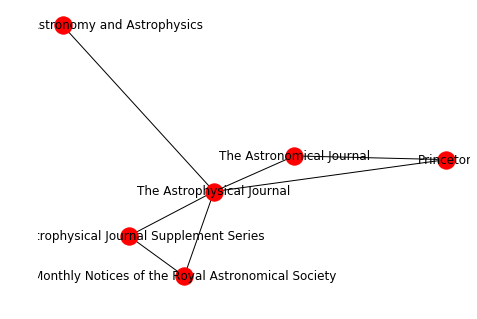

In [513]:
j_proj_sg_largest = bi.weighted_projected_graph(sg_largest, Journals) #Creating the subgroup of the Journal
nx.draw(j_proj_sg_largest,with_labels=1)
plt.show()

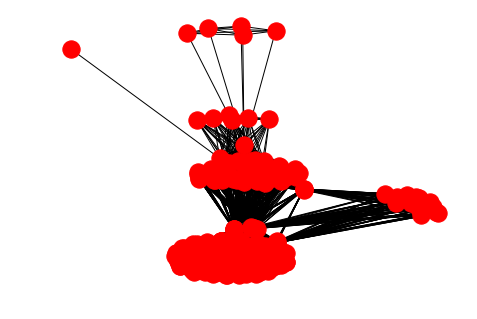

In [507]:
a_proj_sg_largest = bi.weighted_projected_graph(sg_largest, Author_Names) #Creating the subgroup of the Author
nx.draw(a_proj_sg_largest)
plt.show()



TypeError: 'generator' object is not subscriptable

In [514]:
a_proj_sg_largest.edges()

EdgeView([('King, Ivan R.', 'Grillmair, Carl'), ('King, Ivan R.', 'Tremaine, Scott'), ('King, Ivan R.', 'Bower, Gary'), ('King, Ivan R.', 'Magorrian, John'), ('King, Ivan R.', 'Bender, Ralf'), ('King, Ivan R.', 'Burstein, D.'), ('King, Ivan R.', 'Richstone, Douglas'), ('King, Ivan R.', 'Kormendy, John'), ('King, Ivan R.', 'Harris, William E.'), ('King, Ivan R.', 'Faber, S. M.'), ('King, Ivan R.', 'Landolt, Arlo U.'), ('King, Ivan R.', 'Gebhardt, Karl'), ('King, Ivan R.', 'Dressler, Alan'), ('King, Ivan R.', 'Lauer, Tod'), ('King, Ivan R.', 'Heiles, C.'), ('King, Ivan R.', 'Green, Richard'), ('Carr, Michael A.', 'Marriner, John P.'), ('Carr, Michael A.', 'Knapp, G. R.'), ('Carr, Michael A.', 'Castander, Francisco J.'), ('Carr, Michael A.', 'de Mello, Duília F.'), ('Carr, Michael A.', 'Szkody, Paula'), ('Carr, Michael A.', 'Wollack, E.'), ('Carr, Michael A.', 'Wilhite, Brian C.'), ('Carr, Michael A.', 'Page, L.'), ('Carr, Michael A.', 'Szapudi, István'), ('Carr, Michael A.', 'Doi, Mamoru

In [109]:
# Use the Island Method 
j = j_proj_sg_largest.edges(data=True) 
a = a_proj_sg_largest.edges(data=True)

In [110]:
# With a min threshold of edge weight = 1, find the nodes with strong relationships within the sub-graphs. 
# tidy (SNAS Ch. 4) function similar to the one presented in Social Network Analysis Chapter 4. 
def tidy(g, weight):
    g_temp = nx.Graph()
    edge_bunch2 = [i for i in g.edges(data=True) if i[2]['weight'] > weight]    
    g_temp.add_edges_from(edge_bunch2)
    return g_temp

In [111]:
a_sg_island =  tidy(a_proj_sg_largest, 1)
j_sg_island = tidy(j_proj_sg_largest,1)


Degree of centrality of both the island clusters:


In [112]:

# degree centrality of both island clusters
a_degree = nx.degree_centrality(a_sg_island)
j_degree = nx.degree_centrality(j_sg_island)
pd.DataFrame.from_dict(a_degree,orient='index').sort_values(0,ascending=False).head()


,0
The Astrophysical Journal,1.000000
The Astrophysical Journal Supplement Series,0.666667
Monthly Notices of the Royal Astronomical Society,0.666667
The Astronomical Journal,0.333333


In [65]:

pd.DataFrame.from_dict(j_degree,orient='index').sort_values(0,ascending=False).head()


,0
"Heckman, Timothy M.",0.56
"Brinchmann, Jarle",0.56
"White, Simon D. M.",0.56
"Fukugita, Masataka",0.56
"Bender, Ralf",0.40



Examining the connected Subgraphs:


In [66]:
j_connected = [i for i in nx.connected_component_subgraphs(j_proj_sg_largest) if len(i) > 1]
a_connected = [i for i in nx.connected_component_subgraphs(a_proj_sg_largest) if len(i) > 1]

In [67]:
# combining the graphs 
def merge_graph(connected_g):
    g = nx.Graph()
    for h in connected_g:
        g = nx.compose(g,h)
    return g

a_islands = merge_graph(a_connected)
j_islands = merge_graph(j_connected)


Drawing the graph of the Author subgroup:
    

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


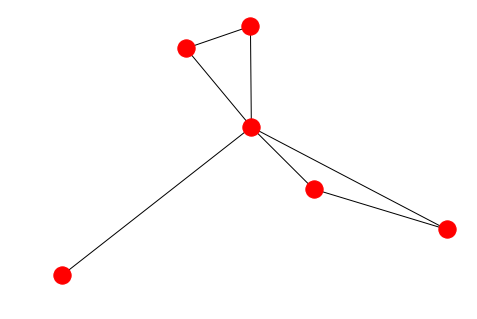

In [68]:
nx.draw(a_islands)


Drawing the graph of the Journal subgroup:
    

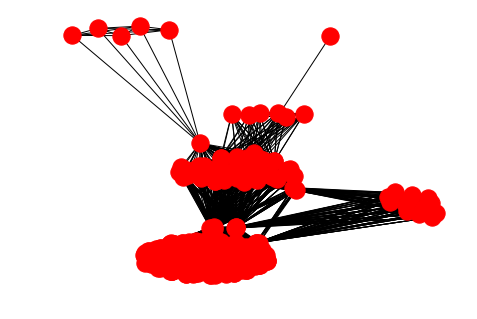

In [70]:
nx.draw(j_islands)
pos=nx.circular_layout(j_islands)

### Conclusion:
From the journal island graph we can see that there are few authors cluster together with same journal. The network shown above is more managable and it is easier to see connections between authors and journals.  

The challenge with the island method is identifying how 'high' to raise the water level.  If the water level is raised too high, then too many nodes are removed and it is challenging to glean information regarding connections between nodes.  If the water level is not raised high enough then there is too much data in the network to be able to identify meaningful trends.